# Task 1: Retrieving and Preparing the Data

For this task, we will import the heart failure data from a csv file. We will then proceed to clean the data and remove any errors, if there.

In [1]:
# Import pandas library
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.dtypes #Analyzing data types of different columns

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
df.info() #There are no irregularities in the count of non-null values for all columns!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#Some columns (like anaemia, smoking, sex, etc.) are binary and we must check them for non-binary values 
print(df['anaemia'].value_counts())
print("")
print(df['smoking'].value_counts())
print("")
print(df['sex'].value_counts())
print("")
print(df['high_blood_pressure'].value_counts())
print("")
print(df['diabetes'].value_counts())
print("")
print(df['DEATH_EVENT'].value_counts())
#We find no errors

0    170
1    129
Name: anaemia, dtype: int64

0    203
1     96
Name: smoking, dtype: int64

1    194
0    105
Name: sex, dtype: int64

0    194
1    105
Name: high_blood_pressure, dtype: int64

0    174
1    125
Name: diabetes, dtype: int64

0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [7]:
#Checking for outliers in Age
df['age'].value_counts()

#We find no error inputs (like negatives, or impossible values)

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

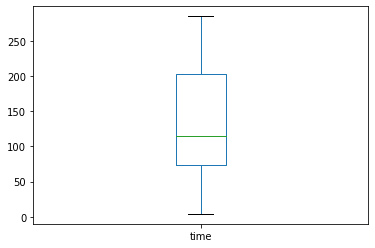

In [8]:
#Checking for outliers in time column
df['time'].plot(kind='box')

#We find no error inputs (like negatives, or impossible values)

In [9]:
#Checking for outliers in ejection_fraction, which contains percentages. 

df['ejection_fraction'].value_counts()
#No outliers(i.e values less than 0 or greater than 100) found!

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

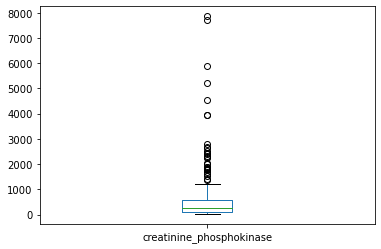

In [10]:
#Checking for outliers in creatinine_phosphokinase
df['creatinine_phosphokinase'].plot(kind='box')

#We notice a few outliers, including two extreme values of more than 7000. However, since there is no given limit to this value, we won't exclude these observations

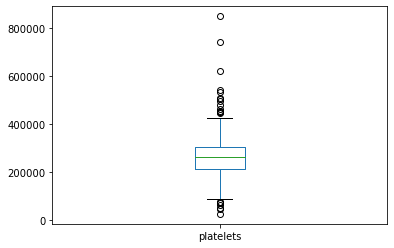

In [11]:
#Checking outliers in platelets column
df['platelets'].plot(kind='box')

#we see no negetive value. There are a few extreme outliers having a platelets count of more than 60,000. However, we won't exclude these observations, since there is no theoritical limit given to us 

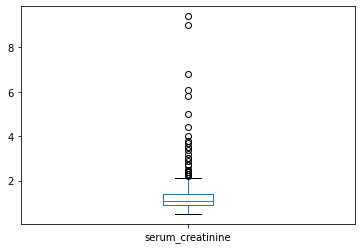

In [12]:
#Checking for outliers in serum_creatinine
df['serum_creatinine'].plot(kind='box')

#we see no negetive value. There are a few extreme outliers having a serum_creatinine count of more than 4 mg/Dl. However, we won't exclude these observations, since there is no theoritical limit given to us 

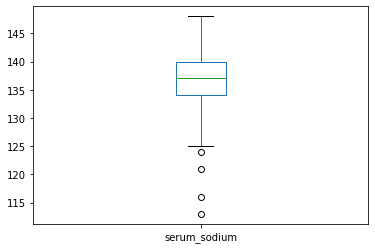

In [13]:
#Checking for outliers in serum_sodium column
df['serum_sodium'].plot(kind='box')

#There are a few extreme outliers having a serum_sodium of less than 125 mEg/l (the normal range is between 135 to 145 mEg). However, there is no theoritical limit given to us and no observation records a serum_sodium of less than 0. Therefore, we won't exclude any observation

# Task 2: Exploring each Column

For this task, we will visualize the data from each column, and try to point out any patterns or conclusions that any column has. 
For this, we will look at the mean of the data, draw a appropriate data visualization tool, and compare the data with that of a normal person, where possible.

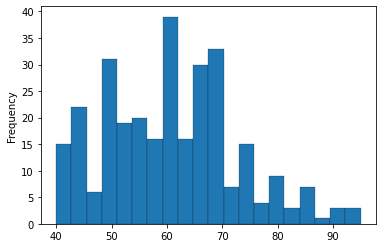

In [14]:
df['age'].plot(kind='hist', bins=20, edgecolor='black', linewidth=0.2)
#We have a higher frequency of patients in the age group of 60 to 70. We also have less patients aged beyond 70

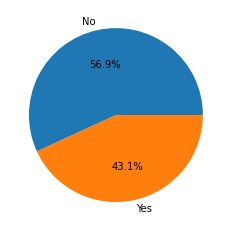

In [15]:
#We notice there are more patients that do not have anaemia, as compared to those suffering from anaemia. However the difference is not very significant
plt.pie(df['anaemia'].value_counts(), labels=['No','Yes'], autopct='%1.1f%%')
plt.show()

In [16]:
#We will explore the continuous/discrete data by plotting the normal distribution of observations. We wrote a method to do the same

def nr_dist(data): ##Method will plot the normal distribution curve (bell curve) of any given column
    sorted_data = sorted(data)  #sort given data
    print("Mean: " + "{:.2f}".format(np.mean(data)))
    probability = stats.norm.pdf(sorted_data, np.mean(sorted_data), np.std(sorted_data)) #Probability Distribution of sorted data
    plt.plot(sorted_data,probability) #plotting line graph of data with its probability
    plt.ylabel('Probability') 
    plt.hist(sorted_data, density=True, bins = 20,edgecolor='black', linewidth=0.2) #plotting histogram of the data
    plt.show()

Mean: 263358.03


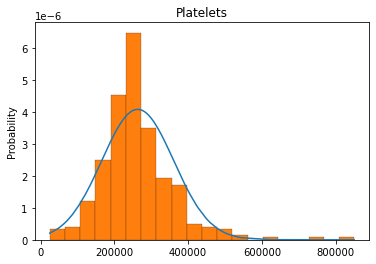

In [17]:
plt.title('Platelets')
nr_dist(df['platelets']) #Bell curve of platelets

#Majority of the observations exist between 200000 to 300000. Almost all observations have a platelets count of less than 60000, with a few outliers
#A normal platelet count range is between 150,000 to 400,000. As such, most of the patients have a desirable platelets count. 

Mean: 1.39


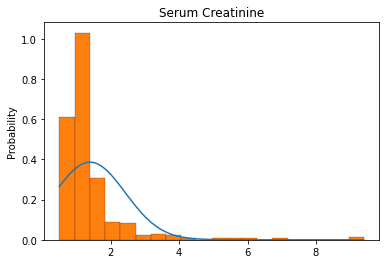

In [18]:
plt.title('Serum Creatinine')
nr_dist(df['serum_creatinine'])

#A normal Serum Creatinine depends on age and sex of the person. However, ideally, it should exist beween 0.6 to 1.3 mg/Dl. 
#Majority of the patients have a Serum Creatinine between 1 to 2 mg/Dl. Few of the patients have an extremely high Serum Creatinine (More than 6 mg/Dl)

Mean: 136.63


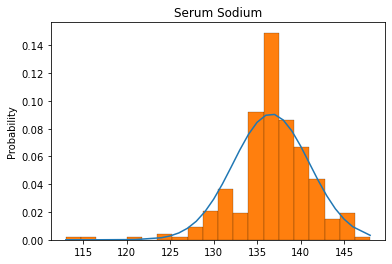

In [19]:
plt.title('Serum Sodium')
nr_dist(df['serum_sodium'])

#Normally, our serum sodium level should exist between 135 to 145 mEg/L. 
#While, most of our patients fall into this category, there is a significant amount of patients that have a lower serum sodium 
#level. It would be interesting to see how low serum sodium levels will impact the patients

Mean: 581.84


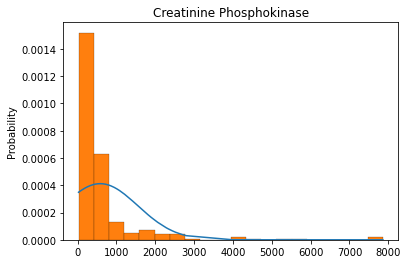

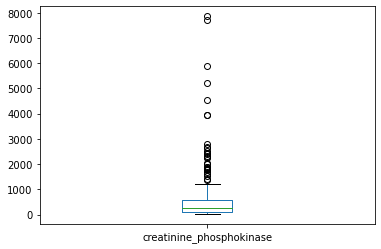

In [20]:
plt.title('Creatinine Phosphokinase')
nr_dist(df['creatinine_phosphokinase'])
df['creatinine_phosphokinase'].plot(kind='box')

#A normal creatinine phosphokinase exists between 10 ml to 120 mcg/l. Clearly, a lot of our patients have a much higher CPK levels. 
#To explore the data further, I also used a box plot to get a sense of how many patients had a hugher than normal CPK. 
#The mean of the data, along the visualisation suggests a higher CPK level in our patients. TThis points towards the fact that heart patients have hugher CPK.

([<matplotlib.patches.Wedge at 0x2286e795f70>,
 [Text(-0.2800466769199712, 1.0637546045710362, 'No'),
  Text(0.28004677651586346, -1.0637545783511695, 'Yes')],
 [Text(-0.1527527328654388, 0.5802297843114742, '58.2%'),
  Text(0.15275278719047095, -0.5802297700097288, '41.8%')])

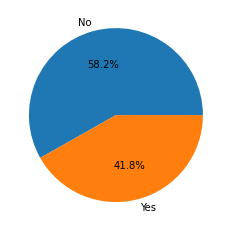

In [21]:
plt.pie(df['diabetes'].value_counts(), labels=['No','Yes'], autopct='%1.1f%%')
#df.diabetes.value_counts().plot.pie()

#There are more patients who are NOT suffering from diabetes, compared to those suffering from diabetes. 
#However the the difference is not extremely significant. As such, the pie chart is very similar to what we saw earlier with anaemia.

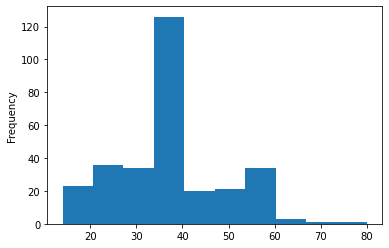

In [22]:
df['ejection_fraction'].plot(kind='hist', bins=10)

#While ejection fraction depends greatly on age of the patient. But broadly, it can be said that EF levels hould exist between 50% to 70%
#Most of our patients have a lower EF percentage, which translates to the fact that heart patients have a lower EF level

([<matplotlib.patches.Wedge at 0x2286e84f8e0>,
 [Text(-0.4957819748741846, 0.9819369803555896, 'No'),
  Text(0.495782066809757, -0.9819369339371271, 'Yes')],
 [Text(-0.2704265317495552, 0.535601989284867, '64.9%'),
  Text(0.27042658189623103, -0.5356019639657056, '35.1%')])

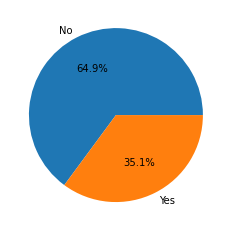

In [23]:
plt.pie(df['high_blood_pressure'].value_counts(), labels=['No','Yes'], autopct='%1.1f%%')

#We observe that only 35.1% of our patients suffer from high blood pressure. 
#It is interesting that most of our patients (amost 65%) DO NOT suffer from high blood pressure

([<matplotlib.patches.Wedge at 0x2286e88f400>,
 [Text(-0.4957819748741846, 0.9819369803555896, 'Men'),
  Text(0.495782066809757, -0.9819369339371271, 'Women')],
 [Text(-0.2704265317495552, 0.535601989284867, '64.9%'),
  Text(0.27042658189623103, -0.5356019639657056, '35.1%')])

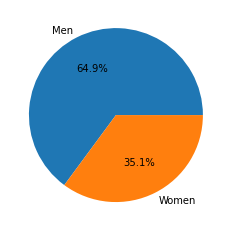

In [24]:
plt.pie(df['sex'].value_counts(), labels=['Men','Women'], autopct='%1.1f%%')

#Majority of pur patients are Men. Only 35.1% of the patients are women. If it is assumed that this data represents all the 
#heart patients, we can positively say that men are more likely to have failure

([<matplotlib.patches.Wedge at 0x2286e8d0550>,
 [Text(-0.5862833750297454, 0.9307372369061695, 'Men'),
  Text(0.586283287887833, -0.9307372917979768, 'Women')],
 [Text(-0.3197909318344065, 0.5076748564942742, '67.9%'),
  Text(0.31979088430245434, -0.50767488643526, '32.1%')])

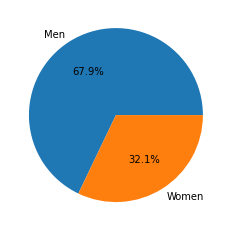

In [25]:
plt.pie(df['smoking'].value_counts(), labels=['Men','Women'], autopct='%1.1f%%')

#According to the data, most of our patients do not smoke. However, 32.1% are smokers and it would be interesting to if those
#who smoke are more prone to 'DEATH_EVENT' or how smoking impacts other factors in the data

## Task 2.1: Relationship Visualisation
It was decided to visualise the relationship between DEATH_EVENT and all other columns. For continuous data columns - boxplots were used, grouped by DEATH_EVENT, aswell as scatterplots using jittering. For discrete data columns - Mosaic plots were used.

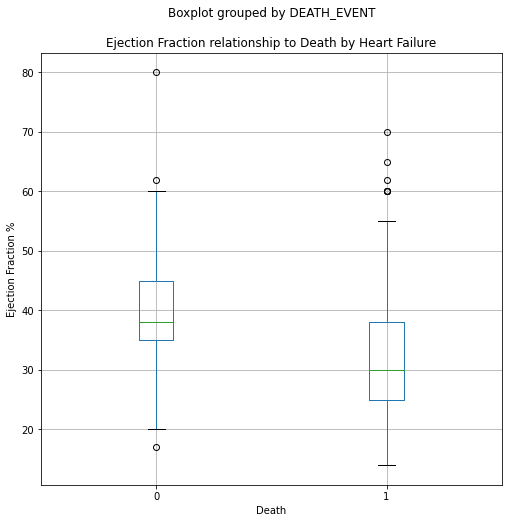

In [26]:
ax = df.boxplot(column = 'ejection_fraction', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Ejection Fraction %")
ax.set_title("Ejection Fraction relationship to Death by Heart Failure")
plt.show()

# Here we observe a strong relationship between Ejection Fraction and Death by  heart failure.
# A lower percentage of blood leaving the heart at each contraction, (below roughly 35%) = A high chance of death by heart failure

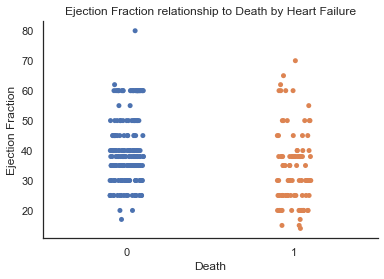

In [27]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='ejection_fraction', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Ejection Fraction")
ax.set_title("Ejection Fraction relationship to Death by Heart Failure")
sns.despine()

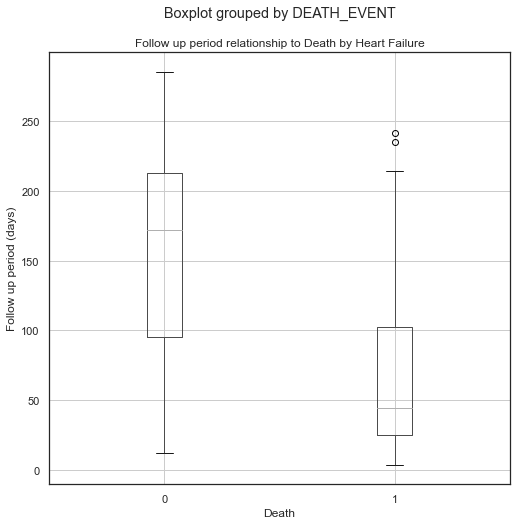

In [28]:
ax = df.boxplot(column = 'time', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Follow up period (days)")
ax.set_title("Follow up period relationship to Death by Heart Failure")
plt.show()

# Here we observe a strong relationship between Follow up period and Death by  heart failure.
# A lower follow up period, (less than roughly 100 days) = A high chance of death by heart failure.

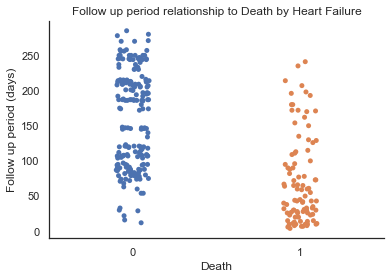

In [29]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='time', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Follow up period (days)")
ax.set_title("Follow up period relationship to Death by Heart Failure")
sns.despine()

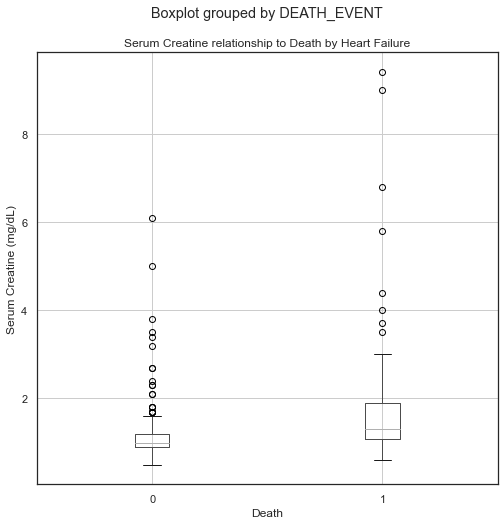

In [30]:
ax = df.boxplot(column = 'serum_creatinine', by= 'DEATH_EVENT', figsize=(8,8))
ax.set_xlabel("Death")
ax.set_ylabel("Serum Creatine (mg/dL)")
ax.set_title("Serum Creatine relationship to Death by Heart Failure")
plt.show()

# Here we observe a strong relationship between Serum creatine and Death by  heart failure.
# A higher level of Serum Creatine, (more than roughly 1.2mg/dL) = A high chance of death by heart failure.

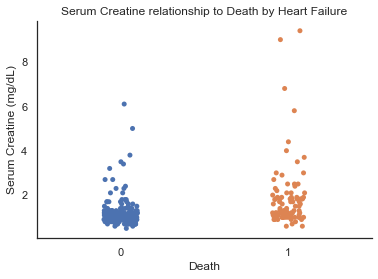

In [31]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='serum_creatinine', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Serum Creatine (mg/dL)")
ax.set_title("Serum Creatine relationship to Death by Heart Failure")
sns.despine()

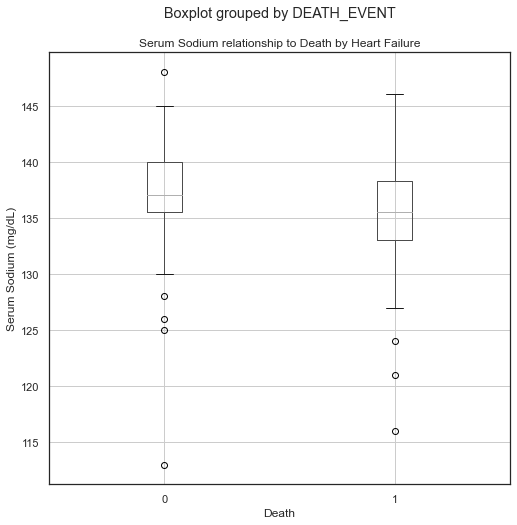

In [32]:
ax = df.boxplot(column = 'serum_sodium', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Serum Sodium (mg/dL)")
ax.set_title("Serum Sodium relationship to Death by Heart Failure")
plt.show()

# Here we observe a weak relationship between Serum sodium and Death by  heart failure.
# A lowet level of Serum sodium, (less than roughly 136mg/dL) = A higher chance of death by heart failure.

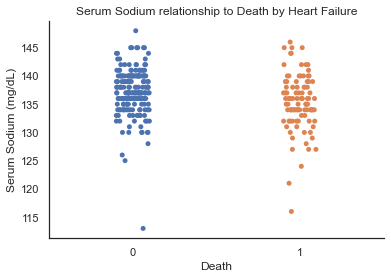

In [33]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='serum_sodium', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Serum Sodium (mg/dL)")
ax.set_title("Serum Sodium relationship to Death by Heart Failure")
sns.despine()



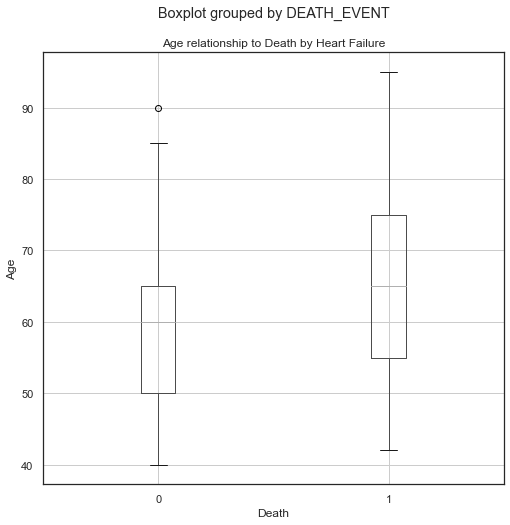

In [34]:
ax = df.boxplot(column = 'age', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Age")
ax.set_title("Age relationship to Death by Heart Failure")
plt.show()

# Here we observe that patients who are older, are slightly more likely to die from heart failure

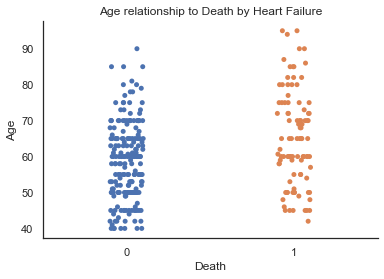

In [35]:
sns.set(style="white", color_codes=True)
ax =sns.stripplot(x='DEATH_EVENT', y='age', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Age")
ax.set_title("Age relationship to Death by Heart Failure")
sns.despine()

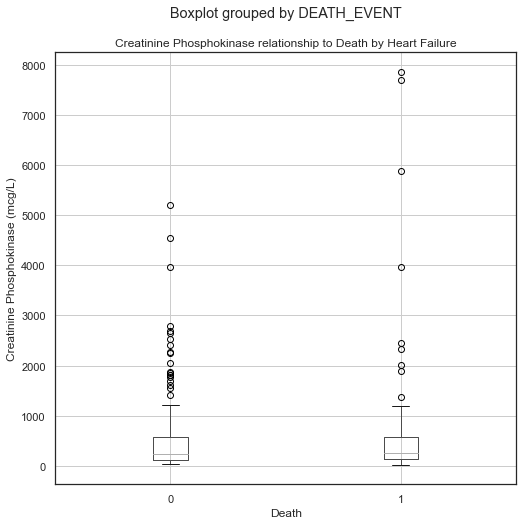

In [36]:
ax = df.boxplot(column = 'creatinine_phosphokinase', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Creatinine Phosphokinase (mcg/L)")
ax.set_title("Creatinine Phosphokinase relationship to Death by Heart Failure")
plt.show()

# little to no relationship

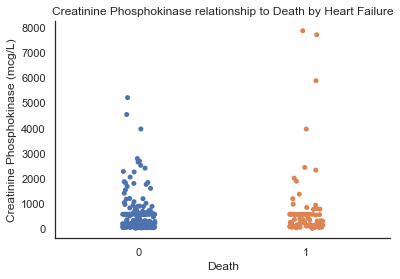

In [37]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Creatinine Phosphokinase (mcg/L)")
ax.set_title("Creatinine Phosphokinase relationship to Death by Heart Failure")
sns.despine()

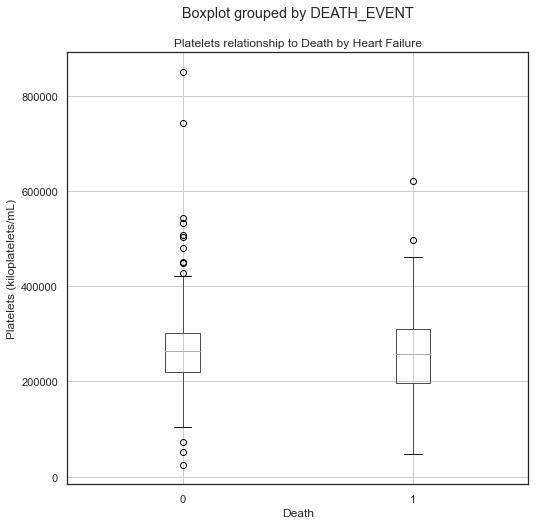

In [38]:
ax = df.boxplot(column = 'platelets', by= 'DEATH_EVENT', figsize=(8, 8))
ax.set_xlabel("Death")
ax.set_ylabel("Platelets (kiloplatelets/mL)")
ax.set_title("Platelets relationship to Death by Heart Failure")
plt.show()
# no relationship

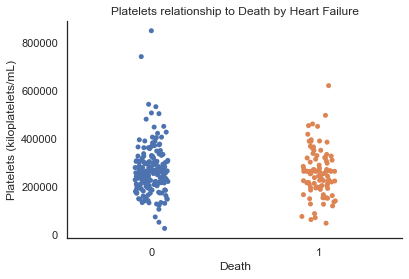

In [39]:
sns.set(style="white", color_codes=True)
ax = sns.stripplot(x='DEATH_EVENT', y='platelets', data=df, jitter=True)
ax.set_xlabel("Death")
ax.set_ylabel("Platelets (kiloplatelets/mL)")
ax.set_title("Platelets relationship to Death by Heart Failure")
sns.despine()

# 

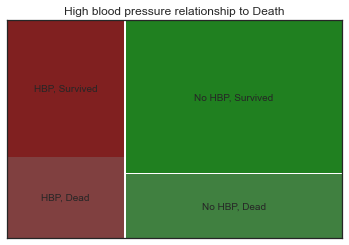

In [40]:
labelizer=lambda k:{('0','0'):'No HBP, Survived',('0','1'):'No HBP, Dead',
                    ('1','0'):'HBP, Survived',('1','1'):'HBP, Dead'}[k]

mosaic(df, ['high_blood_pressure', 'DEATH_EVENT'], title='High blood pressure relationship to Death', labelizer=labelizer, axes_label=False)
plt.show()

# We can see that the percentage of patients with high blood pressure that died is slightly higher than the percentage
# of patients without high blood pressure who died.
# We can see a weak relationship here.

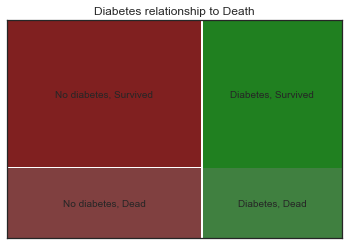

In [41]:
labelizer=lambda k:{('0','0'):'No diabetes, Survived',('0','1'):'No diabetes, Dead',
                    ('1','0'):'Diabetes, Survived',('1','1'):'Diabetes, Dead'}[k]

mosaic(df, ['diabetes', 'DEATH_EVENT'], title='Diabetes relationship to Death', labelizer=labelizer, axes_label=False)
plt.show()

# We can see that the percentage of patients with diabetes that died is similar to the percentage
# of patients without diabetes who died.
# We can see no relationship here.

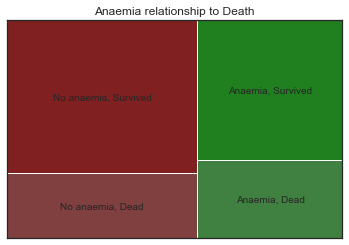

In [42]:
labelizer=lambda k:{('0','0'):'No anaemia, Survived',('0','1'):'No anaemia, Dead',
                    ('1','0'):'Anaemia, Survived',('1','1'):'Anaemia, Dead'}[k]

mosaic(df, ['anaemia', 'DEATH_EVENT'], title='Anaemia relationship to Death', labelizer=labelizer, axes_label=False)
plt.show()

# We can see that the percentage of patients with anemia that died is slightly higher than the percentage
# of patients without anaemia who died.
# We can see a weak relationship here.

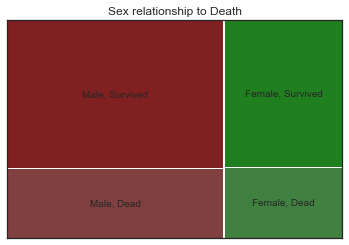

In [43]:
labelizer=lambda k:{('0','0'):'Female, Survived',('0','1'):'Female, Dead',
                    ('1','0'):'Male, Survived',('1','1'):'Male, Dead'}[k]

mosaic(df, ['sex', 'DEATH_EVENT'], title='Sex relationship to Death', labelizer=labelizer, axes_label=False)
plt.show()

# We can see that the percentage of Females that died is very close to the percentage of Males who died. 
# We can see no relationship here.

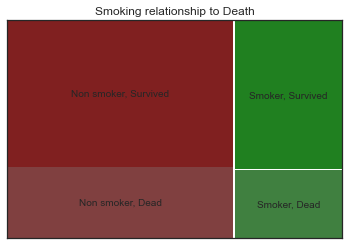

In [44]:
labelizer=lambda k:{('0','0'):'Non smoker, Survived',('0','1'):'Non smoker, Dead',
                    ('1','0'):'Smoker, Survived',('1','1'):'Smoker, Dead'}[k]

mosaic(df, ['smoking', 'DEATH_EVENT'], title='Smoking relationship to Death', labelizer=labelizer, axes_label=False)
plt.show()

# We can see that the percentage of smokers that died is very close to the percentage of non-smokers who died. 
# We can see no relationship here.

In [77]:
from sklearn.model_selection import train_test_split

In [128]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)

current_Score = clf.score(X_test, y_test)
print("Accuracy: " + str(current_Score)[2:4] + "%")

print("\nSignificance of individual features in Decision Tree Classifier:")
for name, importance in zip(x.columns, clf.feature_importances_):
    print(str(name) + ": " + str(importance*100)[0:4] + "%")
    
#Using all the dependent features, gives us a accuracy of 74%. We can also look at the significance of each feature in this model

Accuracy: 78%

Significance of individual features in Decision Tree Classifier:
age: 8.76%
anaemia: 0.91%
creatinine_phosphokinase: 4.33%
diabetes: 0.0%
ejection_fraction: 8.59%
high_blood_pressure: 0.0%
platelets: 0.0%
serum_creatinine: 15.0%
serum_sodium: 7.75%
sex: 1.60%
smoking: 0.0%
time: 53.0%


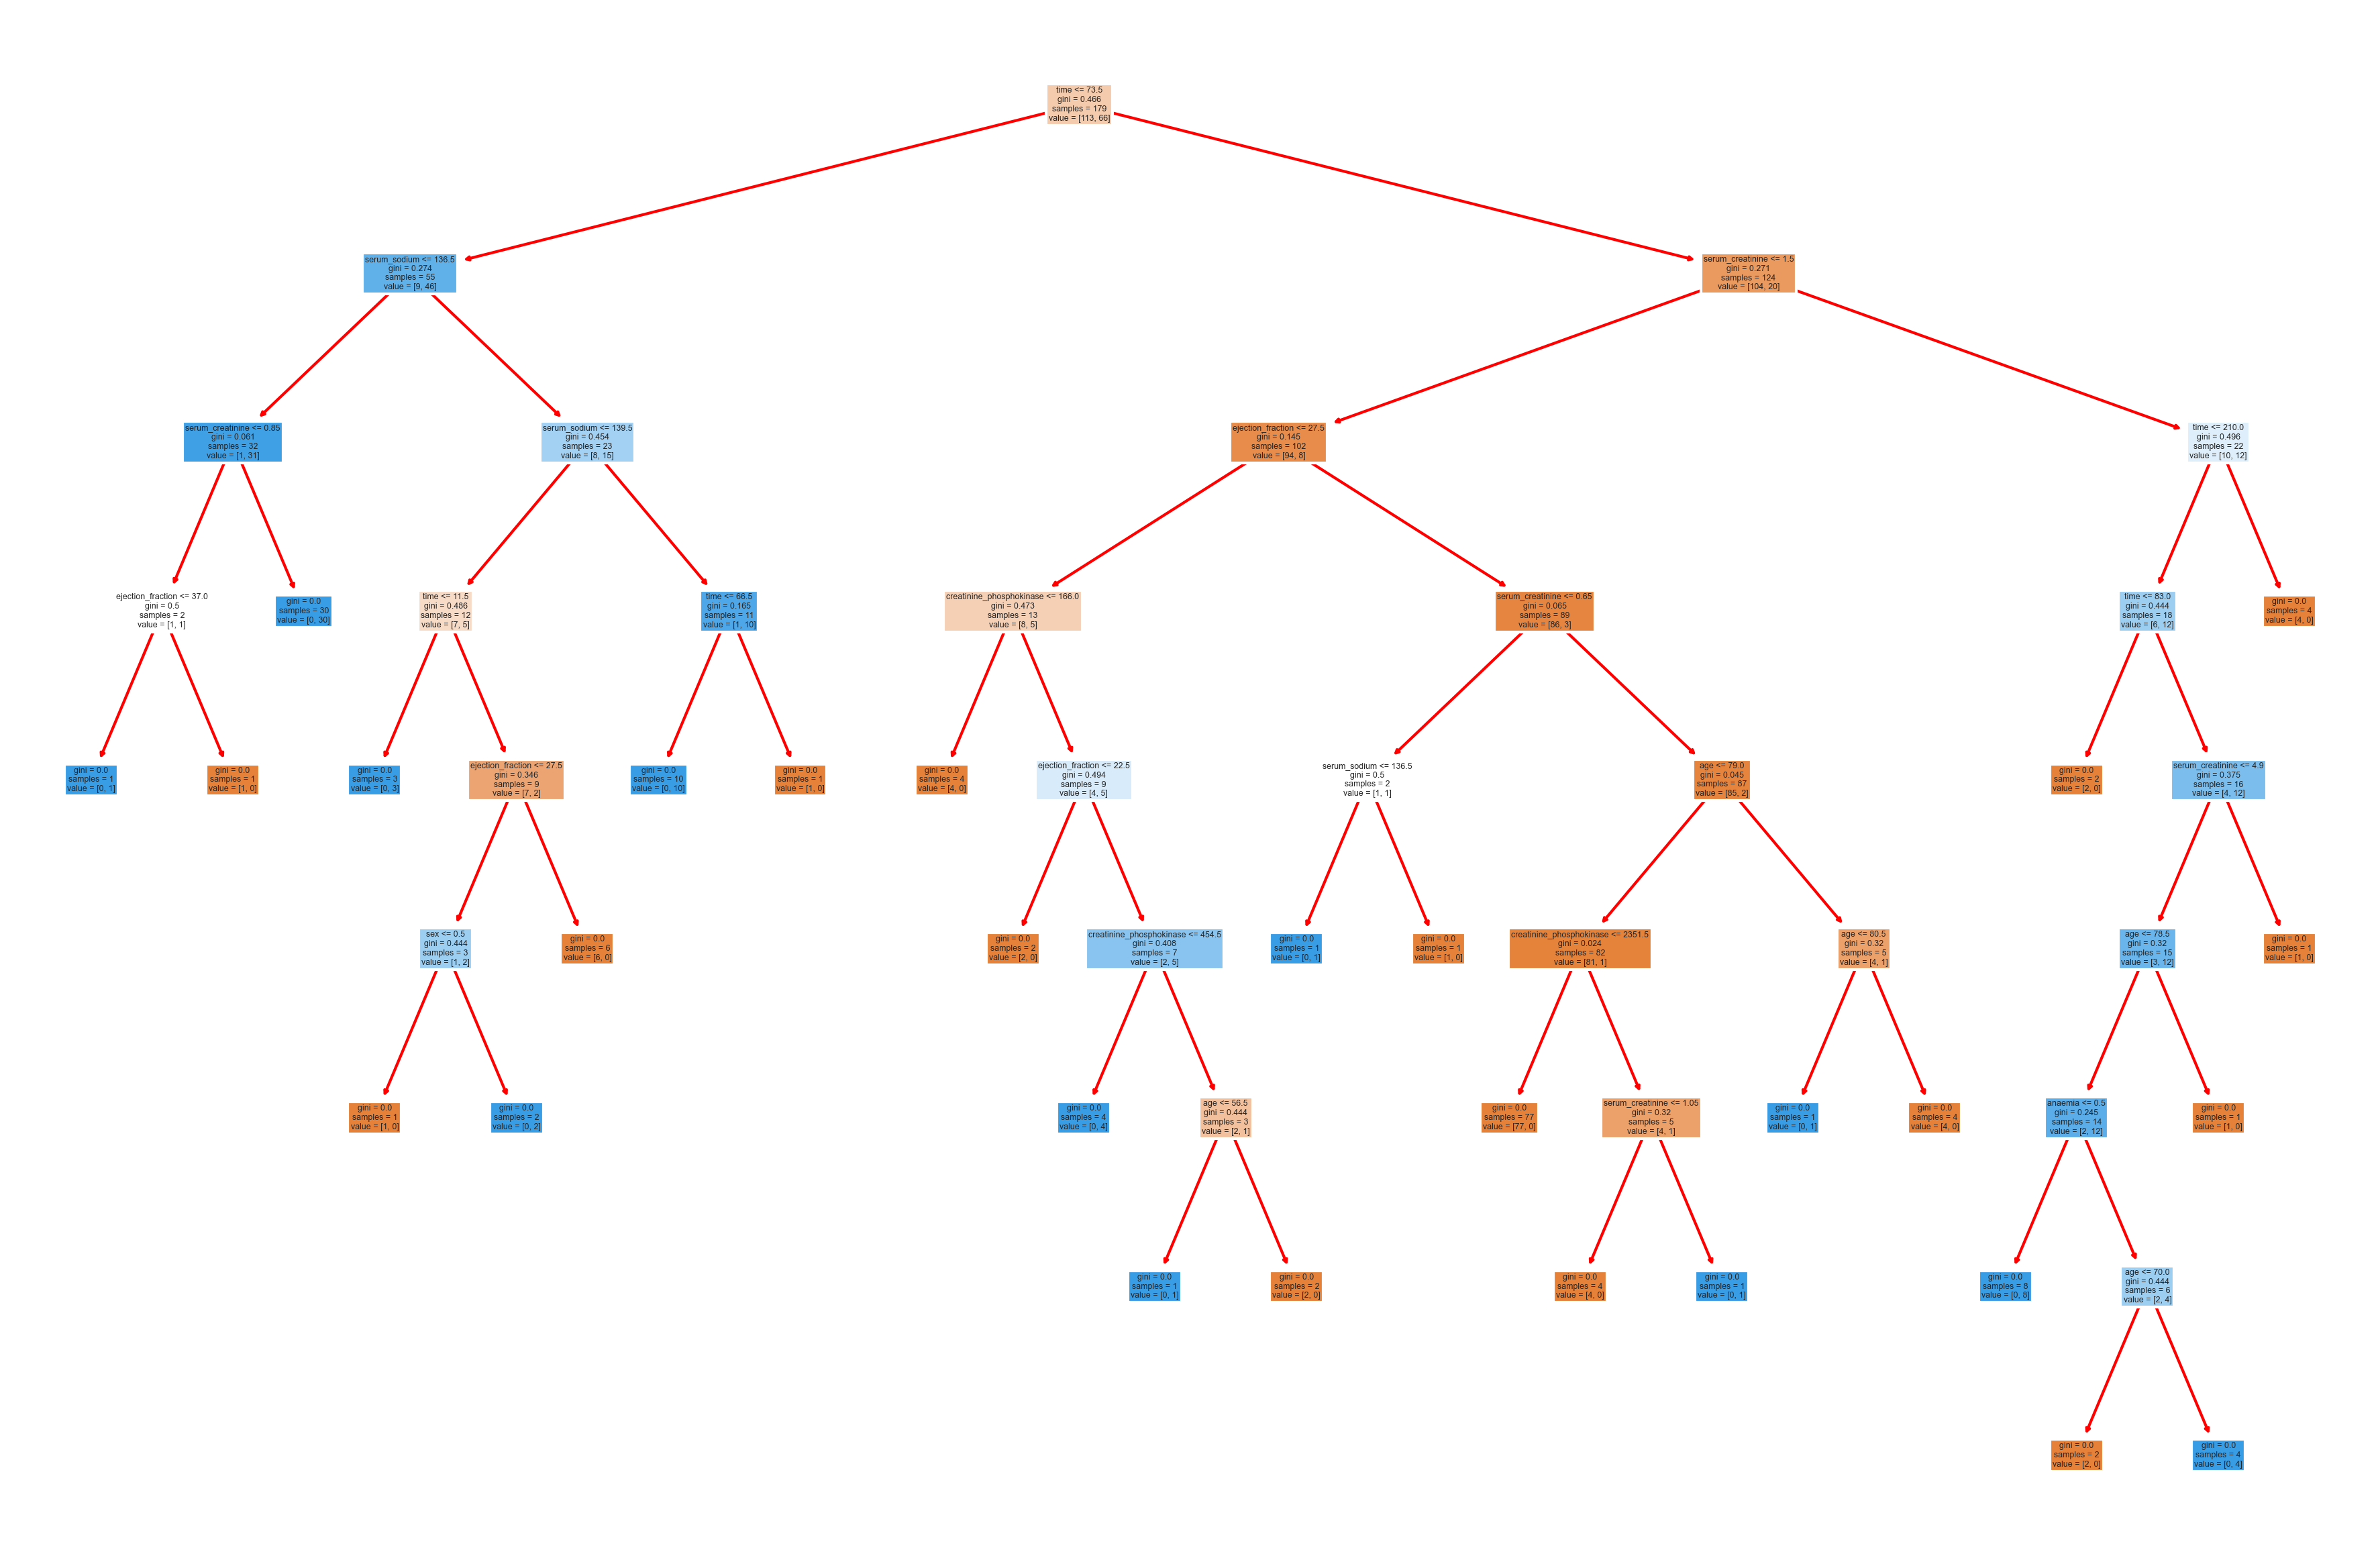

In [129]:
plt.figure(figsize=(15,10), dpi = 300)
out = tree.plot_tree(clf, filled=True, feature_names=list(x.columns))
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)
        
#We see that the graph has a depth of 9. As such, we must evaluate which combinations of the features would be effecient in reducing the depth of this graph 

Accuracy: 81%


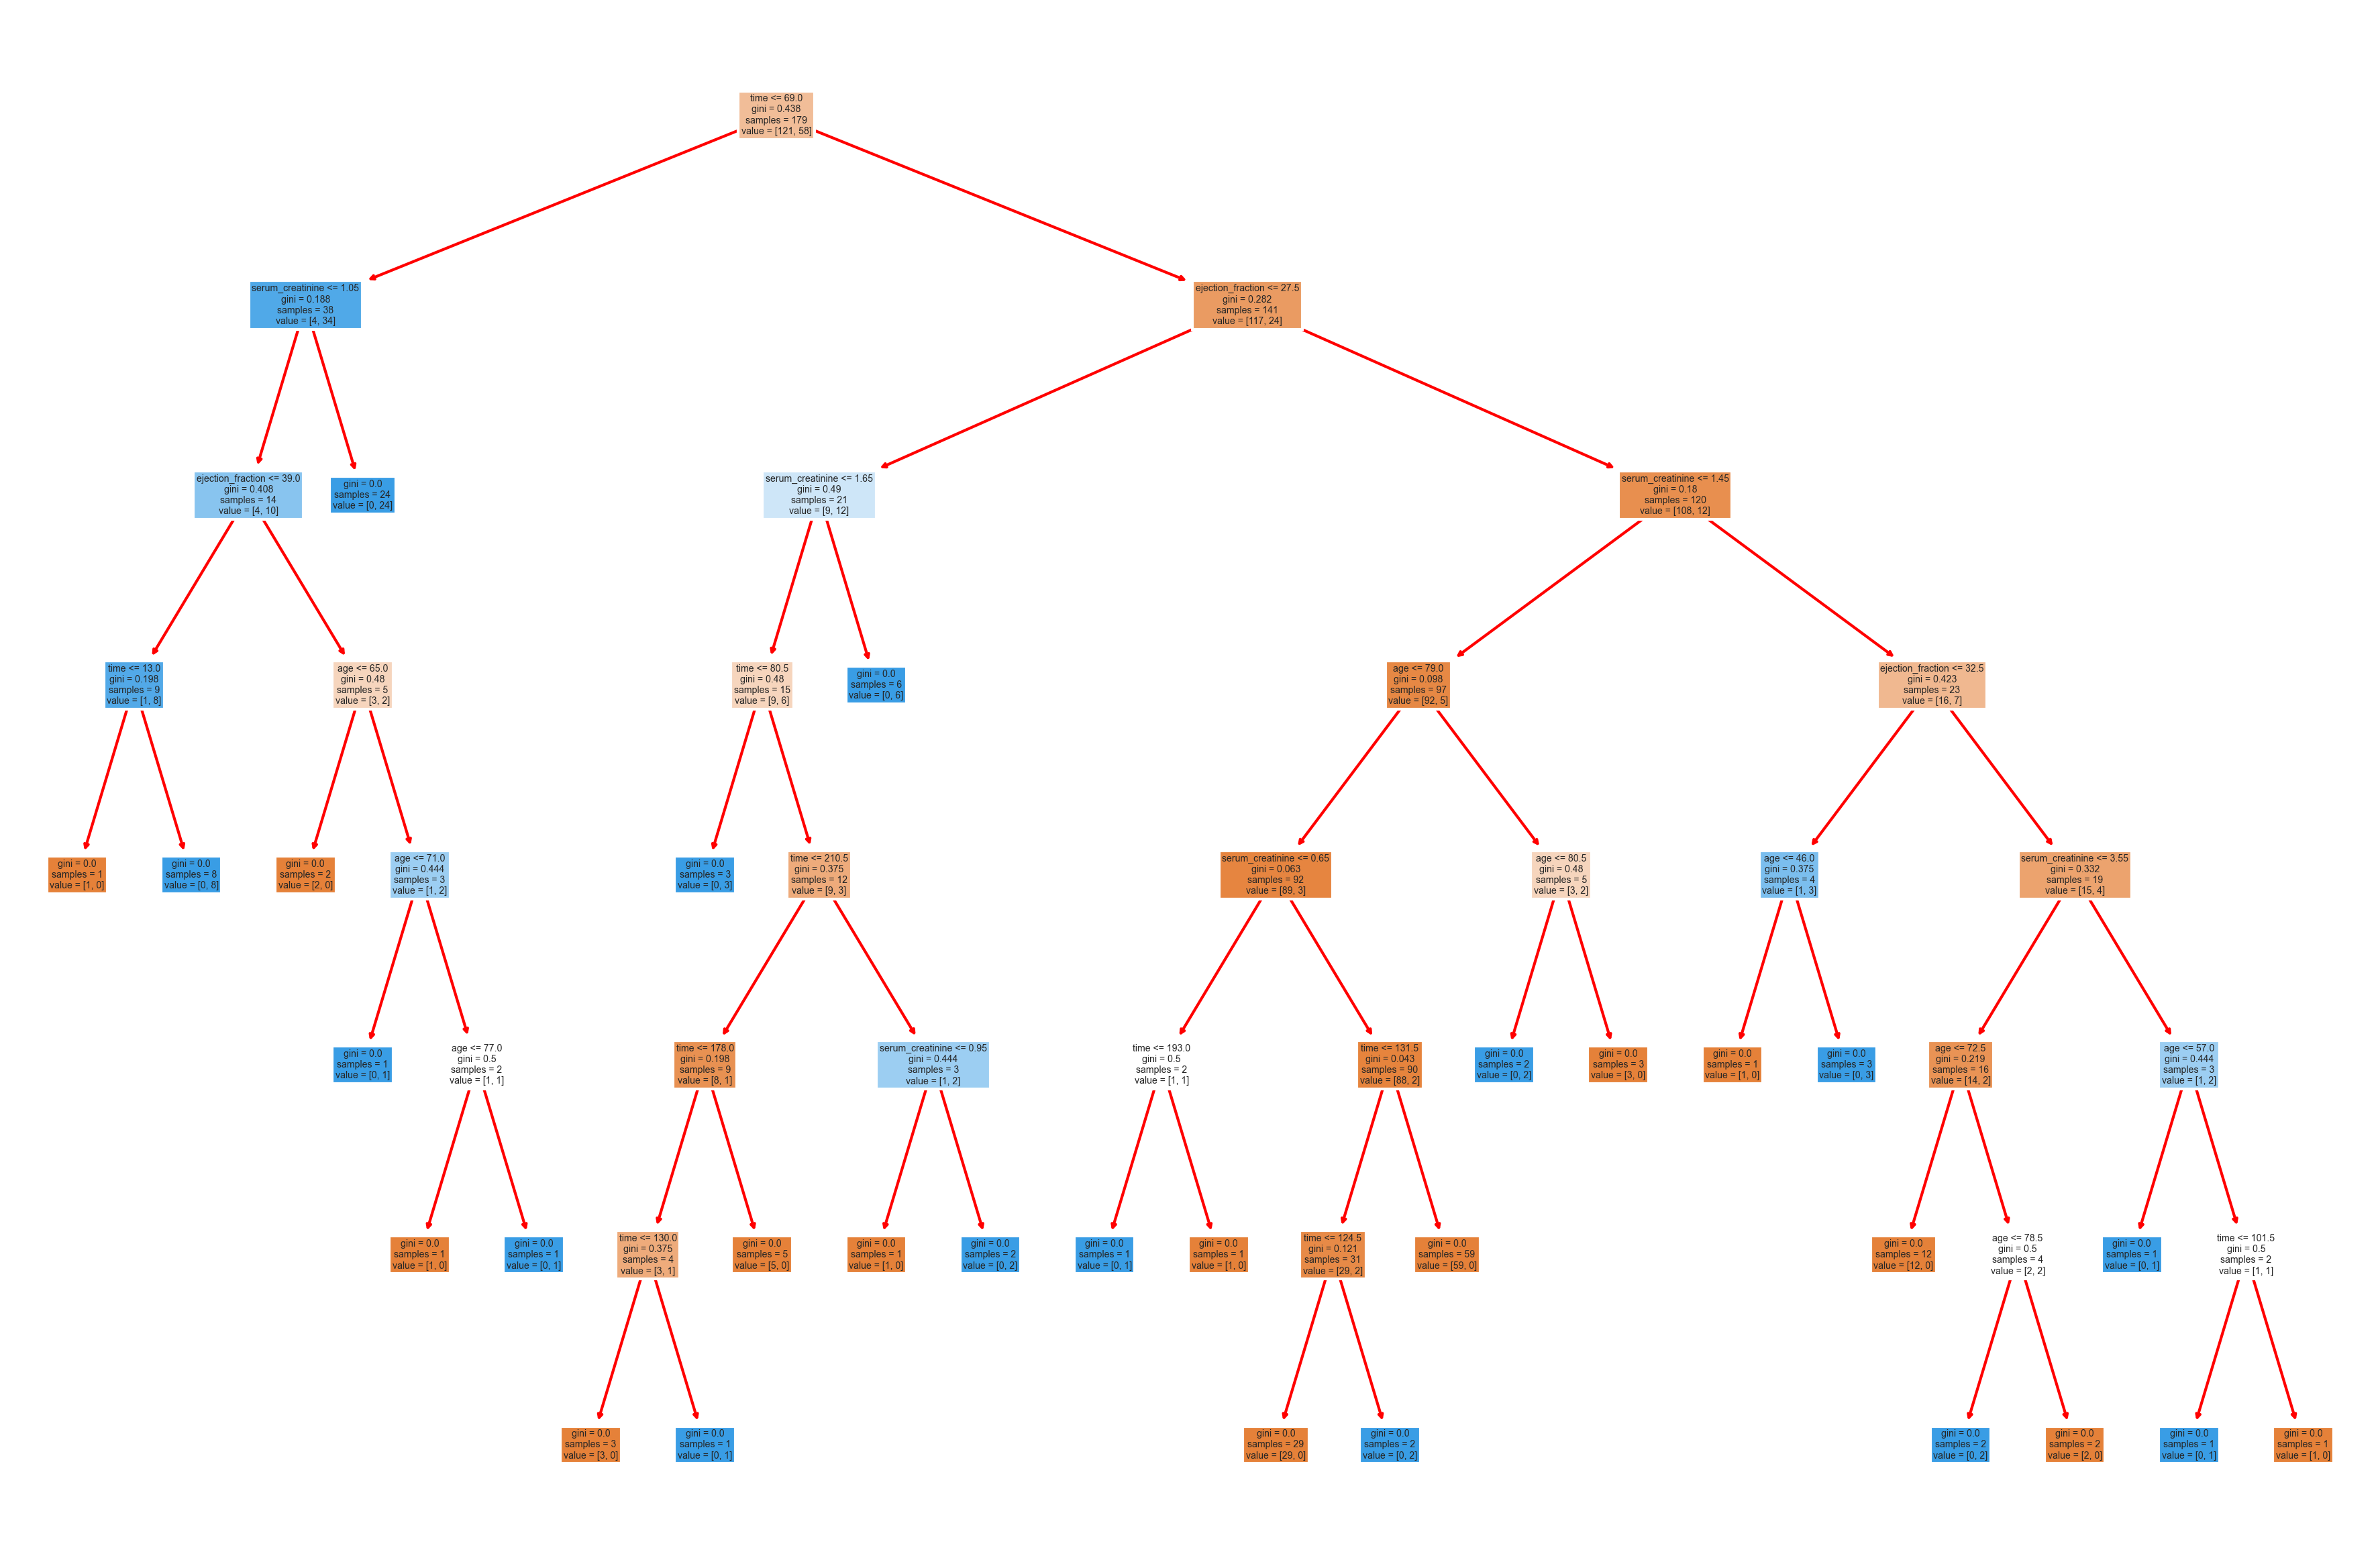

In [138]:
#From previous sections, we know that ejection_fraction, time, serum_creatinine and age have a strong relationship with DEATH_EVENT.
#We can also analyze the Decision tree graph, which shows that the above mentioned features are most significant to the model



x = df[['ejection_fraction', 'serum_creatinine', 'time', 'age']]
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
current_Score = clf.score(X_test, y_test)

print("Accuracy: " + str(current_Score)[2:4] + "%")


plt.figure(figsize=(15,10), dpi = 300)
out = tree.plot_tree(clf, filled=True, feature_names=list(x.columns))
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)
        
        
#The depth of the graph does not see a very significant change. In fact, there is only a slight increase in Accuracy as well. 